<a href="https://colab.research.google.com/github/IMI1998/Stress-Level-Detection.ipynb/blob/main/Stress_Level_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [174]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import tensorflow.keras as k
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time

In [175]:
df = pd.read_csv("/content/stress_train.csv")

In [176]:
df.head()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,11.001565,...,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380,2.139754,1.163485,2,0
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,9.170129,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,2.174499,1.084711,2,1
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,11.533417,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,2.135350,1.176315,2,1
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,11.119476,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,2.178341,1.179688,2,0
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,13.590641,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,2.221121,1.249612,2,0


In [177]:
# df = df.applymap(lambda x: x if x >= 0 else None).dropna()

In [178]:
# df=df.drop_duplicates()

In [179]:
# df.corr().abs().unstack().sort_values(kind='quicksort')

In [180]:
df.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,...,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.0,369289.000000
mean,846.650104,841.965890,109.352531,14.977498,14.976767,7.396597,73.941824,9.841143,0.866001,10.593708,...,39.245603,1.615576,4.433282,3185.356025,115.977200,0.048506,2.062471,1.182292,2.0,0.631657
std,124.603984,132.321005,77.117025,4.120766,4.120768,5.143834,10.337453,8.195574,0.990189,2.914795,...,45.398869,1.761073,4.123365,1923.227187,360.855129,0.049238,0.206999,0.062192,0.0,0.761307
min,547.492221,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,3.911344,...,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128,0.434576,1.033984,2.0,0.000000
25%,760.228533,755.750735,64.205641,11.830959,11.830671,4.541896,66.715776,3.666667,0.000000,8.368340,...,10.720312,0.346803,1.228054,1828.147788,14.737458,0.012433,2.032977,1.139929,2.0,0.000000
50%,822.951438,819.689595,82.608243,14.415918,14.415388,5.952112,74.217809,7.600000,0.466667,10.196621,...,24.841938,1.039513,3.356860,2796.856587,28.789747,0.034735,2.134214,1.174293,2.0,0.000000
75%,924.117422,916.821570,118.237002,17.927144,17.924839,7.919841,80.334937,13.333333,1.466667,12.679005,...,45.272368,2.245115,6.354266,4052.260157,80.429614,0.067854,2.181929,1.223621,2.0,1.000000
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752308,39.400000,5.466667,18.836107,...,364.486936,13.095664,30.120917,13390.684100,7796.443096,0.431043,2.234841,1.361219,2.0,2.000000


In [181]:
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.preprocessing import MinMaxScaler

In [182]:
df.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'datasetId', 'condition'],
      dtype='object')

In [183]:
X = df[['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'sampen', 'higuci', 'datasetId']]
y = df['condition']

In [184]:
# sc = MinMaxScaler()
# X_sc = sc.fit_transform(X)

In [185]:
# skb = SelectKBest(score_func=chi2 , k=10)
# best_feature_fit =skb.fit(X,y)

In [186]:
# Feature_scores = pd.DataFrame(best_feature_fit.scores_ , columns=['Feature_Scores'])

In [187]:
# X.columns

In [188]:
# feature_column_names = pd.DataFrame(X.columns, columns=['Feature_Name'])
# best_feat_df = pd.concat([Feature_scores ,feature_column_names]  , axis=1)
# best_feat_df

In [189]:
# best_feat_df.nlargest(10 , 'Feature_Scores')

In [190]:
df2 = pd.read_csv("/content/stress_train.csv")


In [191]:
label = ['condition']
features = ['LF_HF' , 'VLF' ,'TP' ,'SD2' ,'HF','SDRR','MEDIAN_RR' , 'MEAN_RR' , 'HF_NU']

In [192]:
scaler = StandardScaler()
scaler.fit(df2[features])
df2[features] = scaler.transform(df2[features])

In [193]:
x = df2[features].values
y = df2[label].values

In [194]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.3 , random_state=40)

In [195]:
print(x_train.shape , x_test.shape ,y_train.shape , y_test.shape)

(258502, 9) (110787, 9) (258502, 1) (110787, 1)


In [196]:
y_train = k.utils.to_categorical(y_train)
y_test = k.utils.to_categorical(y_test)

In [197]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [198]:
model = Sequential()
model.add(Dense(50 , activation='relu' , kernel_initializer='he_normal' , input_shape=(x_train.shape[1],)))
model.add(Dense(20 , activation='relu' , kernel_initializer='he_normal' ))
model.add(Dense(10 , activation='relu' , kernel_initializer='he_normal' ))
model.add(Dense(3 , activation='softmax' ))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [199]:
model.compile(optimizer='adam' , loss='categorical_crossentropy' , metrics=['accuracy'])

In [200]:
history = model.fit(x_train , y_train , validation_data=(x_test , y_test) , epochs=50 , batch_size = 1024 , verbose=1)

Epoch 1/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5662 - loss: 0.9357 - val_accuracy: 0.7067 - val_loss: 0.7156
Epoch 2/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7258 - loss: 0.6681 - val_accuracy: 0.7706 - val_loss: 0.5663
Epoch 3/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7795 - loss: 0.5429 - val_accuracy: 0.8030 - val_loss: 0.4898
Epoch 4/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8077 - loss: 0.4726 - val_accuracy: 0.8172 - val_loss: 0.4442
Epoch 5/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8247 - loss: 0.4282 - val_accuracy: 0.8302 - val_loss: 0.4091
Epoch 6/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8392 - loss: 0.3955 - val_accuracy: 0.8445 - val_loss: 0.3802
Epoch 7/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8511 - loss: 0.3691 - val_accuracy: 0.8616 - val_loss: 0.3450
Epoch 8/50
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8694 - loss: 0.3339 - val_accuracy: 0.

<Axes: >

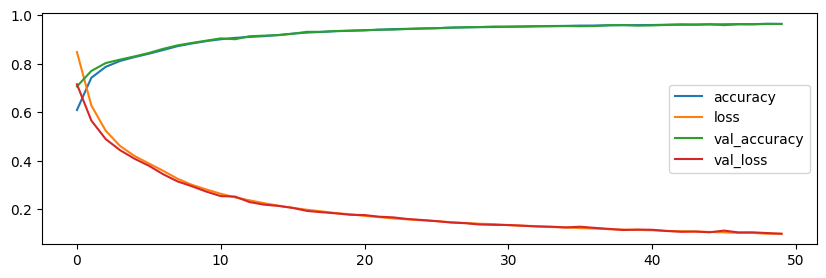

In [201]:
pd.DataFrame(history.history).plot(figsize=(10,3))

In [202]:
df_test = pd.read_csv('/content/stress_test.csv')

In [203]:
df_test[features] = scaler.transform(df_test[features])
df_test[features].head()

,LF_HF,VLF,TP,SD2,HF,SDRR,MEDIAN_RR,MEAN_RR,HF_NU
0,-0.295775,-0.651793,-0.773051,-0.447632,0.602911,-0.449061,-0.866822,-1.001159,1.291909
1,-0.157544,-0.789781,-0.429732,-0.664855,-0.280746,-0.659429,0.018455,-0.024971,-0.671814
2,0.037412,0.021016,0.594459,0.303110,-0.511482,0.304688,0.942446,0.897836,-0.889291
3,-0.241658,0.072366,-0.172058,0.112104,-0.477196,0.109828,0.003930,-0.175046,-0.260620
4,-0.280126,1.404937,1.104744,0.450708,-0.089133,0.448876,-0.710578,-0.721825,0.450839


In [204]:
x = df_test[features].values
y = df_test[label].values

In [205]:
y = k.utils.to_categorical(y)

In [206]:
loss , acc = model.evaluate(x , y , verbose=1)

1283/1283 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9656 - loss: 0.0955


In [207]:
data = pd.read_csv('/content/stress_test.csv')

In [208]:
t = scaler.transform(data[features].iloc[100].values.reshape(1,-1))
print(t)

[[ 0.76295762  2.33450441  2.39155619  0.92140928 -0.78886675  0.92207544
   1.96339206  1.9733837  -1.01334153]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [209]:
y_pred = model.predict(t)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step


In [210]:
print(np.argmax(y_pred[0]))
print(data[label].iloc[100])

1
condition    1
Name: 100, dtype: int64
